# 1. Подготовительные операции

# 1.1. Инициализация

In [1]:
import numpy as np
from sympy.plotting import plot
from scipy import signal
import matplotlib.pyplot as plt 
from matplotlib import rcParams

# Графики непосредственно в ноутбуке
%matplotlib inline

fontName = "Liberation Serif"    # Название шрифта
rcParams["mathtext.fontset"] = "custom" # Пользовательские параметры графика
rcParams["mathtext.rm"] = fontName  # Обычный стиль
rcParams["mathtext.bf"] = fontName + ":bold"    # Жирный
rcParams["mathtext.it"] = fontName + ":italic"  # Курсив

# Моделирование фазоманипулированных сигналов
PIC_SIZE = (10, 6)  # Размер графика
PIC_DENSITY = 80    # Плотность пикселей графика
fontSize = 10   # Размер шрифта графиков
fontType = ''   # Тип шрифта график
tColor = "#0000FF"  # Цвет графиков во временной области (синий)
tColorLight = "#4DB3E6"   # Временная область (голубой)
Color0 = "#FF0000"  # Цвет графиков эталонного сигнала (красный)
fColor="#FF6600"; # Цвет графиков в частотной области
eColor = "#D95319"    # Погрешности
eColorLight = "#E6E666"   # Погрешности
eColorDark = "#A2142F"    # Погрешности

# 1.2 Формирование значений основных параметров

In [2]:
S0 = 2 # Уровень ФСПМ, Вт/Гц
S_mu = 0 # Математическое ожидание ФСПМ
S_sigma = 0.1*S0 #Среднеквадратичное отклонение ФСПМ
snrS =- 20 # Уровень SNR, дБ
fd = 100 # Частота дискретизации, Гц
N = 1000 # Количество точек ФСПМ
fmin = 15 # Частота среза ФСПМ, Гц
fmax = 25 # Частота среза ФСПМ, Гц
Nmin = round(2*(N-1)*fmin/fd+1) # Номера отсчетов ...
Nmax = round(2*(N-1)*fmax/fd+1) #  ... частот среза ФСПМ

# 2. Моделирование сигнала по функции спектральной плотности мощности

# 2.1 Моделирование исходной функции спектральной плотности мощности

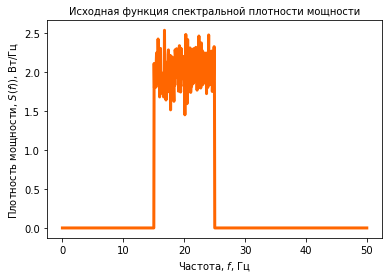

In [10]:
# Моделирование исходной ФСПМ
# Формирование ФСПМ
f = np.linspace(0, fd / 2, N) # Область определения ФСПМ
rS = np.random.normal(S_mu, S_sigma, Nmax - Nmin + 1) # Случайная составляюшая с учетом распределения вероятности

sFSPM = np.empty(N)
sFSPM[0:Nmin - 1] = 0 # Минимальный уровень
np.put(sFSPM, np.arange(Nmin, Nmax), (S0 + rS)) # Максимальный уровень
sFSPM[Nmax + 1:N] = 0 # Минимальный уровень

# Формирование графика
plt.plot(f, sFSPM, color=fColor, linewidth=3)
plt.title("Исходная функция спектральной плотности мощности", fontname="Liberation Serif", fontsize=10)   # Заголовок
plt.xlabel("Частота, $\mathit{f}$, Гц", fontname="Liberation Serif", fontsize=10)    # Надпись оси абсцисс
plt.ylabel("Плотность мощности, $\mathit{S(f)}$), Вт/Гц", fontname="Liberation Serif", fontsize=10)    # Надпись оси ординат
plt.show()    # Отрисовка графика

# 2.2 Моделирование амплитудного спектра сигнала

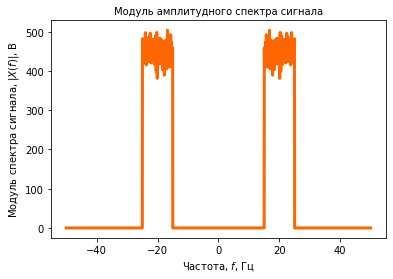

In [11]:
# Формирование амплитудного спектра сигнала
NN = 2*N # Количество точек в спектре
sf = np.concatenate([-np.flip(f[0:]), f]) # Область определения
sX2 = np.concatenate([np.flip(sFSPM[0:])/2, sFSPM[0:]/2]) # Формирование значений
sX = np.sqrt(NN*fd*sX2)

# Формирование графика
plt.plot(sf,sX, color=fColor, linewidth=3)

plt.title("Модуль амплитудного спектра сигнала", fontname="Liberation Serif", fontsize=10)   # Заголовок
plt.xlabel("Частота, $\mathit{f}$, Гц", fontname="Liberation Serif", fontsize=10)   # Надпись оси абсцисс
plt.ylabel("Модуль спектра сигнала, |$\mathit{X(f)}$|, В", fontname="Liberation Serif", fontsize=10)    # Надпись оси ординат
plt.show()    # Отрисовка графика

# 2.3 Моделирование сигнала во временной области

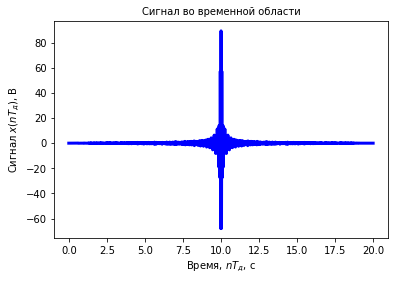

In [12]:
# Формирование сигнала во временной области по ФСПМ
td = 1 / fd # Период дискретизации
dt = NN*td # Длина временного интервала
t = np.linspace(0, dt, NN) # Область определения сигнала
x = np.fft.ifft(np.fft.fftshift(sX)) # Обратное преобразование Фурье

# Формирование графика
plt.plot(t, np.real(np.fft.ifftshift(x)), color=tColor, linewidth=3)

plt.title("Сигнал во временной области", fontname="Liberation Serif", fontsize=10)   # Заголовок
plt.xlabel("Время, $\mathit{nT_д}$, с", fontname="Liberation Serif", fontsize=10)    # Надпись оси абсцисс
plt.ylabel("Сигнал $\mathit{x(nT_д)}$, В", fontname="Liberation Serif", fontsize=10)    # Надпись оси ординат
plt.show()    # Отрисовка графика

# 2.4. Верификация функции спектральной плотности мощности

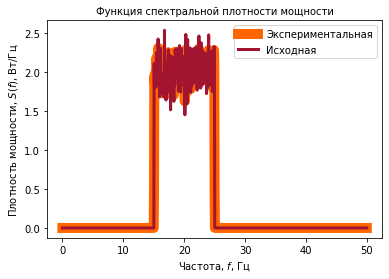

In [13]:
pf, ff = signal.periodogram(np.real(x), fd, signal.boxcar(x.size), x.size) # Формирование значений

# Формирование графика
plt.plot(pf, ff, color=fColor, linewidth=10, label="Экспериментальная")

plt.title("Функция спектральной плотности мощности", fontname="Liberation Serif", fontsize=10)   # Заголовок
plt.xlabel("Частота, $\mathit{f}$, Гц", fontname="Liberation Serif", fontsize=10)    # Надпись оси абсцисс
plt.ylabel("Плотность мощности, $\mathit{S(f)}$, Вт/Гц", fontname="Liberation Serif", fontsize=10)    # Надпись оси ординат

plt.plot(f, sFSPM, color=eColorDark, linewidth=3, label="Исходная")
plt.legend()
plt.show()

# 3. Моделирование сигнала по автокорреляционной функции

# 3.1 Моделирование исходной автокорреляционной функции

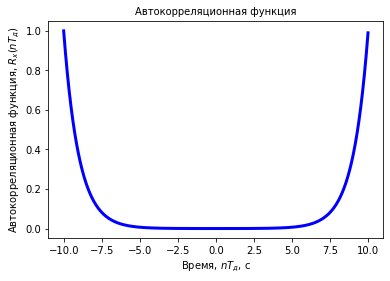

In [14]:
# Моделирование исходной АКФ
# Формирование АКФ
dt = 10 # Длительность сигнала
N = 1001 # Количество отсчетов сигнала
td = dt / (N - 1) # Период дискретизации
NN = np.dot(2, N) - 1 # Количество точек АКФ 
t = np.linspace(-dt, dt, NN) # Область определения
sACF0 = np.exp(-t[0:NN-N+1]);
sACF0 = sACF0 / np.amax(sACF0)
sACF = np.concatenate([sACF0[0:], np.flip(sACF0[1:])]) # Формирование значений

# Формирование графика
plt.plot(t, sACF, color=tColor, linewidth=3)

plt.title("Автокорреляционная функция", fontname="Liberation Serif", fontsize=10)   # Заголовок
plt.xlabel("Время, $\mathit{nT_д}$, с", fontname="Liberation Serif", fontsize=10)   # Надпись оси абсцисс
plt.ylabel("Автокорреляционная функция, $\mathit{R_x(nT_д)}$", fontname="Liberation Serif", fontsize=10)    # Надпись оси ординат
plt.show()    # Отрисовка графика

# 3.2 Моделирование функции спектральной плотности

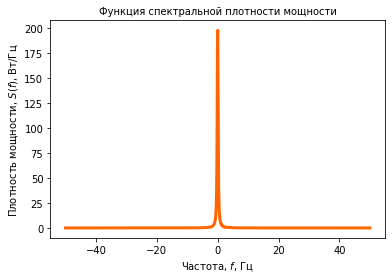

In [15]:
# Формирование функции спектральной плотности
fd = 1 / td # Частота дискретизации
f = np.linspace(-fd / 2, fd / 2, N) # Область определения
aFSPM0 = np.fft.fft(sACF) # Формирование значений 
aFSPM = signal.decimate(aFSPM0, 2)

# Формирование графика
plt.plot(f, np.absolute(np.fft.fftshift(aFSPM)), color=fColor, linewidth=3)

plt.title("Функция спектральной плотности мощности", fontname="Liberation Serif", fontsize=10)   # Заголовок
plt.xlabel("Частота, $\mathit{f}$, Гц", fontname="Liberation Serif", fontsize=10)    # Надпись оси абсцисс
plt.ylabel("Плотность мощности, $\mathit{S(f)}$, Вт/Гц", fontname="Liberation Serif", fontsize=10)    # Надпись оси ординат
plt.show()    # Отрисовка графика

# 3.3 Моделирование амплитудного спектра сигнала

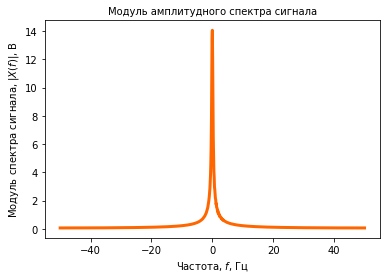

In [16]:
# Формирование функции спектральной плотности
sX = np.sqrt(aFSPM) # Формирование значений
 
# Формирование графика
plt.plot(f, np.absolute(np.fft.fftshift(sX)), color=fColor, linewidth=3)

plt.title("Модуль амплитудного спектра сигнала", fontname="Liberation Serif", fontsize=10)   # Заголовок
plt.xlabel("Частота, $\mathit{f}$, Гц", fontname="Liberation Serif", fontsize=10)    # Надпись оси абсцисс
plt.ylabel("Модуль спектра сигнала, |$\mathit{X(f)}$|, В", fontname="Liberation Serif", fontsize=10)    # Надпись оси ординат
plt.show()    # Отрисовка графика

# 3.5 Моделирование сигнала во временной области

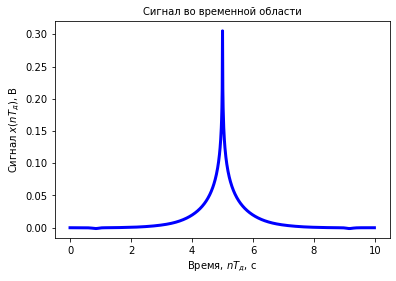

In [18]:
# Моделирование сигнала во временной области по ФСПМ
x = np.real(np.fft.ifft(sX)) # Обратное преобразование Фурье
x = np.fft.ifftshift(x) # Смещение сигнала

# Формирование графика
plt.plot(t[NN-N-1:NN-1], x, color=tColor, linewidth=3)

plt.title("Сигнал во временной области", fontname="Liberation Serif", fontsize=10)   # Заголовок
plt.xlabel("Время, $\mathit{nT_д}$, с", fontname="Liberation Serif", fontsize=10)    # Надпись оси абсцисс
plt.ylabel("Сигнал $\mathit{x(nT_д)}$, В", fontname="Liberation Serif", fontsize=10)    # Надпись оси ординат
plt.show()    # Отрисовка графика

# 3.6 Верификация автокорреляционной функции

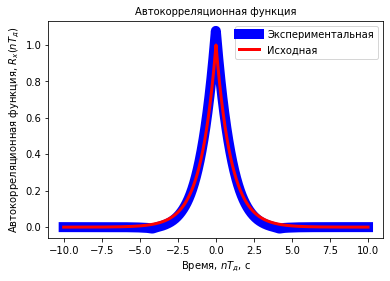

In [19]:
# Расчет АКФ
xACF = np.correlate(x, x, "full") # Формирование значений

# Формирование графика
plt.plot(t, xACF, color=tColor, linewidth=10, label="Экспериментальная")

plt.title("Автокорреляционная функция", fontname="Liberation Serif", fontsize=10)   # Заголовок
plt.xlabel("Время, $\mathit{nT_д}$, с", fontname="Liberation Serif", fontsize=10)    # Надпись оси абсцисс
plt.ylabel("Автокорреляционная функция, $\mathit{R_x(nT_д)}$", fontname="Liberation Serif", fontsize=10)    # Надпись оси ординат

plt.plot(t, np.fft.ifftshift(sACF), color=Color0, linewidth=3, label="Исходная")
plt.legend()
plt.show()    # Отрисовка графика